# Part 1

a) **NetworkX library** 

   Homepage of NetworkX- https://networkx.org/documentation/stable/index.html
   
   NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of  
   complex networks. With NetworkX you can load and store networks in standard and nonstandard data formats, generate many  
   types of random and classic networks, analyze network structure, build network models, design new network algorithms, 
   draw networks, and much more.
   
   NetworkX provides:
      - tools for the study of the structure and dynamics of social, biological, and infrastructure networks      
      - a standard programming interface and graph implementation that is suitable for many applications

   *Examples*
   ```
   import networkx as nx
   #Create empty graph
   G = nx.Graph()
   
   #Add nodes
   G.add_node(1)
   G.add_nodes_from([2, 3]) #list
   G.add_nodes_from([(4, {"color": "red"}),(5, {"color": "green"}),]) #attributes
   
   #Add edge
   G.add_edge(1, 2)
   e = (2, 3)
   G.add_edge(*e)  #unpack tuple
   G.add_edges_from([(1, 2), (1, 3)])
   
   #Simple inquiry
   G.number_of_nodes()
   G.number_of_edges()
   
   #Directed Graph
   DG = nx.DiGraph()
   
   #Draw Graph 
   import matplotlib.pyplot as plt
   nx.draw(G, with_labels=True, font_weight='bold')

   ```
    

b) **Basics of  Social Network Analysis** 
    
   DataCamp Article https://www.datacamp.com/community/tutorials/social-network-analysis-python
    
   Networks are everywhere, whether we are talking about roads, social group connections, or the internet infrastrucure,the 
   ability to analyze these networks and make informed decisions based on them is a skill that is important for any data 
   analyst.
   
   *Symmetric graph*, a graph in which the realtionship between the nodes (vertices) is  symmetric-if node A is related to 
   node B, then node B is also  related to node A. This is the typical "Facebook friend" network- if you are someone's 
   friend then that someone is also your friend. 
   
   *Assymetric graph*, a graph in which the relationship between nodes is 'child of'- if A is the child of B, then B is not
   a child of A. If A is related to B, does not necessarily means that B is associated with A). This is known as a 
   directional Graph in which each edge has a direction (A --> B, B-->A  => A<-->B). 
   
   *Weighted networks*, each edge has a particular weight to represent the strength of the relationship.
   
   *Multigraph*, each node can have multiple edges to another node to represent different relationships- A-->B, "friendship"
   A-->B, 'years of friendship', ... .
   
   <u>Network Metrics</u> , useful in knowing how the information will spread through the network
   
- *Degree*, the number of connections a node has. 
- *Clustering Coefficient*, this represents the nodes in common between a node and the rest of its friends.
- *Distance*, the shortest path between two nodes and its length
- *Eccentricity*, the largest distance between A and all other nodes.

<u>Centrality Measures</u> ,how to find the most important nodes (individuals) in the network.
  
    
- *Degree Centrality*, a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. 
- *Eigenvector Centrality*, it is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node (Similar to  PageRank).
- *Betweenness Centrality*, it quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network; can have a strategic control and influence on others. 

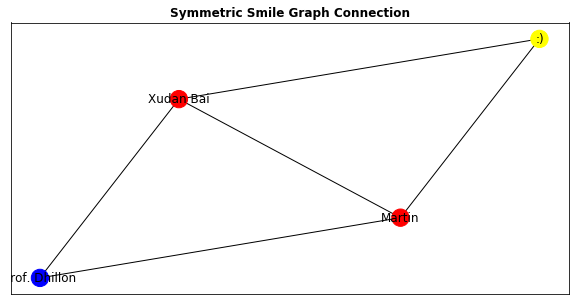

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_title('Symmetric Smile Graph Connection', fontweight='bold')

G_symmetric = nx.Graph()
G_symmetric.add_edge('Martin','Xudan Bai')
G_symmetric.add_edge('Martin','Prof. Dhillon')
G_symmetric.add_edge('Prof. Dhillon','Xudan Bai')
G_symmetric.add_edge('Martin',':)')
G_symmetric.add_edge('Xudan Bai',':)')
nx.draw_networkx(G_symmetric,nodelist=['Martin','Xudan Bai',':)', 'Prof. Dhillon'], node_color=['red','red','yellow','blue'])

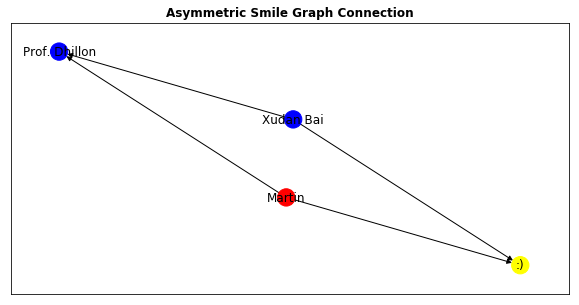

In [19]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_title('Asymmetric Smile Graph Connection', fontweight='bold')

G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('Martin',':)')
G_asymmetric.add_edge('Martin','Prof. Dhillon')
G_asymmetric.add_edge('Xudan Bai','Prof. Dhillon')
G_asymmetric.add_edge('Xudan Bai',':)')
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric,nodelist=['Martin','Xudan Bai',':)', 'Prof. Dhillon'], node_color=['red','blue','yellow','blue'])

c) **Basic Network Analyses**
- Load the directed network graph (G) from the file amazonNetwork.csv

In [6]:
import csv 
#Read data
Data  = open('amazonNetwork.csv', "r", encoding='utf8')

#Skip Header
next(Data, None)

#Create Directed graph object
Graphtype = nx.DiGraph()

#Create Network 
G = nx.read_edgelist(Data, delimiter=',',  create_using=Graphtype, data=[('FromNodeID',int),('ToNodeId',int)])

#G info
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 2647
Number of edges: 10841
Average in degree:   4.0956
Average out degree:   4.0956


- How  many  items  are  present  in  the  network  and  how  many  co-purchases  happened?

> There are a total of **2647** unique items. These are items that are both in the "FromNodeID" & "ToNodeId".

> From the documentation "*each directed edge between two nodes representsa co-purchase.*" Hence, the total number of edges is able to provide the total number of co-purchases happend, which is **10,841**. Although, this might sound counterintuituve at first, it does indeed make sense. One tends to buy other products when purchasing a determinate product. The average # of products bought after the original product is 4 (out degree). 

- Compute the average shortest distance between the nodes in graph G. Explain your results briefly.

> Closeness centrality, it represents the average distance, or average shortest path, to all other vertices in the network. The basic idea here is that a central vertex will be closer on average than other, less central vertices. This also makes sense from an influence perspective: a person who can easily reach other people will be more effective in spreading influence. In the case of closeness centrality, or average shortest path length, lower values indicate more central nodes. In the context of our problem the average distance is: **9.5927**, which is moderately low distance value. In addition to the default function "average_shortest_path_length", I attempted to manually calulate the average distance by caluclatin the distance of each node against all other nodes and then checking out the final average. This procedure yielded a mean of **10.0971** which is indeed very close and simlar to the previous mean gotten.

> Betweenness centrality attempts to capture the ability of a vertex to control the flow of communication: it indicates how many times a vertex is located on the shortest path between two other vertices. A vertex situated on a large number of such paths has an increased power to control communication since any information passing through those paths will pass through the vertex. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex. It represents the degree of which nodes stand between each other. 
    - High betweenness centrality nodes play a significant role in the network. 
    - High betweenness centrality nodes can have a strategic control and influence other nodes.


> betweenness_centrality function selected options:  
    -  normalized betweenness values 
    -  include the endpoints in the shortest path counts
    -  K=n, k node samples to estimate betweenness; the higher the better 

> Results, after running the betweness_centrality funtion, a dictionary with node- betweenness_centrality (b.c.) is returned. The mean value for the b.c. is **0.0039** with a standard deviation of  0.0093. This value is indeed small, reflecting the fact that the majority of products are not important, AND only a select minority where the b.c. is high is indeed central to the network flow. 

> The table shows the top 5 most important nodes & the bottom 5 least important nodes based on the betweeness centrality score. 

Node                    | Betweness Centrality Score
------------------------| --------------------------
18                      |      0.148118
8                       |      0.141221
97                      |      0.129423 
117                     |      0.104195
481                     |      0.093565
.....                   |      ........
1504                    |	  0.000008
1502 	                |      0.000008
1503 	                |      0.000008
1500 	                |      0.000007
2463 	                |      0.000007

In [21]:
#Average Shortest Path
avg_shortest_path=nx.average_shortest_path_length(G)
avg_shortest_path

9.592795477759587

Mean:    10.097088036192455
Median:  11.346006144393241
Sd:      4.302406419683554


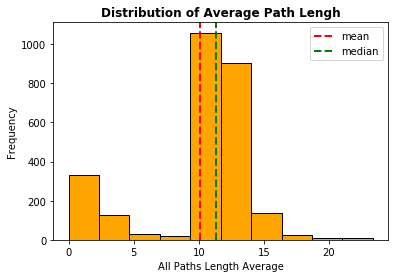

In [23]:
#Find length of all simple paths
import numpy as np
all_paths = nx.shortest_path_length(G)

avg_all_paths = []
#Find average distance of each node from other nodes
for x in all_paths:
    index,lengths=x
    temp= lengths.values()
    avg_temp= sum(temp)/len(temp)
    avg_all_paths.append(avg_temp)

#Mean & Median
print('Mean:   ', np.mean(avg_all_paths))
print('Median: ', np.median(avg_all_paths))
print('Sd:     ', np.std(avg_all_paths))

#Histogram
_= plt.hist(avg_all_paths,  align='mid', orientation='vertical', color='orange', label=None, edgecolor= 'k')
_=plt.xlabel('All Paths Length Average')
_=plt.ylabel('Frequency')
_=plt.title('Distribution of Average Path Lengh', fontweight='bold')
_= plt.axvline(np.mean(avg_all_paths), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(np.median(avg_all_paths), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.legend()

plt.show()

Mean:    0.003926051641807273
Median:  0.0011050758995802595
Sd:      0.009367396055762955


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:3122: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:3128: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


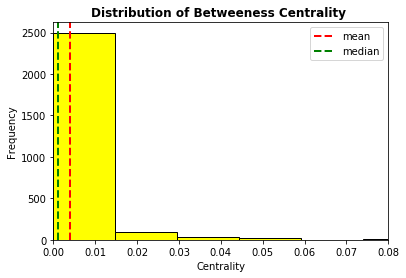

In [24]:
#Centrality Betweeness
betweenCentrality= nx.betweenness_centrality(G,k=2647, normalized=True,endpoints=True )
centrality = pd.DataFrame.from_dict(betweenCentrality, orient='index', columns=['Centrality'])
centrality=centrality.sort_values(by=['Centrality'], ascending=False)

#Mean & Median
print('Mean:   ', np.mean(centrality['Centrality']))
print('Median: ', np.median(centrality['Centrality']))
print('Sd:     ', np.std(centrality['Centrality']))

#Histogram
_= plt.hist(centrality['Centrality'],  align='mid', orientation='vertical', color='yellow', label=None, edgecolor= 'k')
_=plt.xlabel('Centrality')
_=plt.ylabel('Frequency')
_=plt.title('Distribution of Betweeness Centrality ', fontweight='bold')
_= plt.axvline(np.mean(centrality['Centrality']), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(np.median(centrality['Centrality']), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.xlim(xmax = 0.08, xmin = 0)
_=plt.legend()

plt.show()

In [25]:
print(centrality.head())
centrality.tail()

     Centrality
18     0.148118
8      0.141221
97     0.129423
117    0.104195
481    0.093565


,Centrality
1504,0.000008
1502,0.000008
1503,0.000008
1500,0.000007
2463,0.000007


(-0.9101642805337906,
 1.1815088230371475,
 -1.0904521054029463,
 0.9885157650709152)

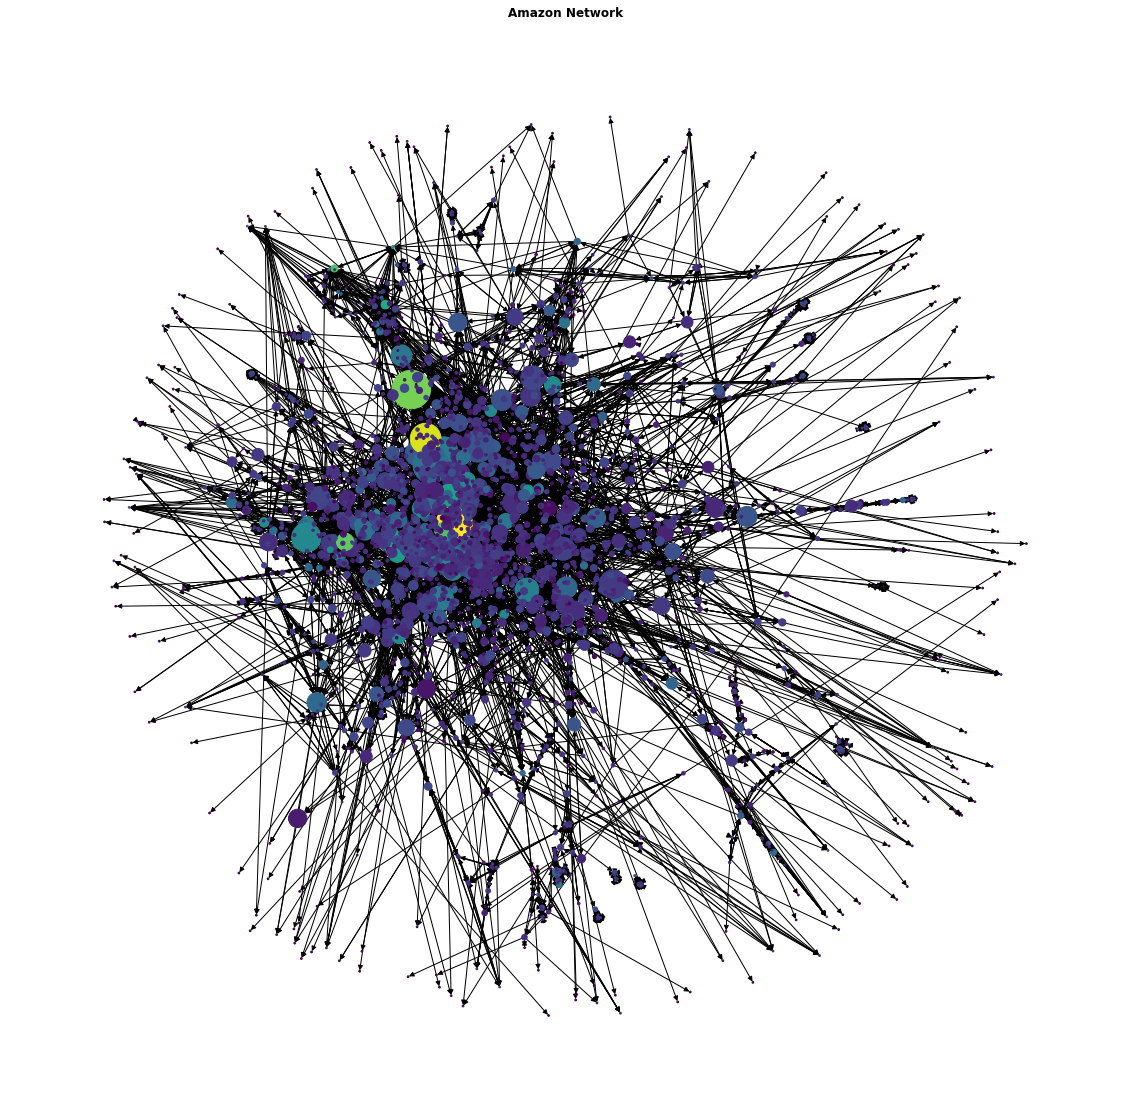

In [120]:
#Graph Vizualization based on Betweenes Centrality 

'''
Comment: the graph below, allows us to get a better idea of the network. It further confirms the findings mentioned 
above- many nodes with low centrality & few nodes (different colors) with high centrality. 
This graph looks very much like my head- a structured mess :D
'''

pos = nx.spring_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betweenCentrality.values()]
plt.figure(figsize=(20,20))
plt.title('Amazon Network', fontweight='bold')
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

- Compute  the  transitivity  and  the  average  clustering  coefficient  of  the  networkgraph G. Explain your findings.


> The transitivity ratio and the clustering coefficient are popular statistics that measure the number of triangles in a network.  Both measures can be expressed as probabilities. At the root of it, both methods aim at solving the same problem in alternative ways.  Additionally, clustering coefficient places more weight on low degree nodes, while  transitivity ratio places more weight on the high degree nodes.  Finally, both values are quite similar to eachother and moderately high hinting at the idea of a tight network. 

> Transitivity, metric to characterize subgraphs formed by 3 nodes-triads. For exmaple, twhen there is a tie from A to B, and also from B to C,then there is also a tie from A to C- "friends of my friends are my friends". For random graphs, the expected value of the transitivity metric is close to the density of the graph; for real networks,values between 0.3 and 0.6 are quite usual- in our result the transitivity is 0.4339 which falls under the "usual" values umbrella.

> Clustering Coefficient, a metric to find clusters of nodes that share connections, or more explicitly "the degree to which nodes in a graph tend to cluster together." Local Clustering Coefficient allows one to determine the clusters of a node - the fraction of pairs of the node's connections that are connected with each other. In our result the clustering  coefficient is 0.4086  which is indeed moderately high suggesting clusters of nodes thightly knitted together. 


Metric                  |  Score
------------------------| ---------------
Transitivity            |      0.4339
Average Clustering      |      0.4086

In [26]:
#Compute Transitivity ==> 3 (#triangles/#triads)
trans = nx.transitivity(G)
trans

0.4339169154480595

In [27]:
#Clustering
avg_cluster=nx.average_clustering(G)
avg_cluster

#Same, for confirmation
#cluster_res=nx.clustering(G)
#avg_cluster_res= np.mean(list(cluster_res.values()))
#avg_cluster_res

0.4086089178720651

- Apply thePageRankalgorithm to network G with damping value 0.5 and find the 10 nodes with the highest PageRank.  Explain your findings briefly.

>  PageRank function computes a ranking of the nodes in the graph G based on the structure of the relationships links. 
    - Parameters modified *alpha*, which represents the damping parameter for PageRank.

> The results for the top 10 nodes with the highest PageRank score are available in the table below. The nodes with the highest PageRank score represent the most important nodes in the network. In our problem these node represent product purchased and the edge relationship represents the product purchased subsequently. Important nodes (products) are those that are purchased after the purchase of another product. To put it in simple terms, these high PageRank nodes are products that are almost obvious in the customer shopping habits, for they are purchased right away after the previous purchase. These have a high number of incoming links. This fact is indeed confirmed if we examine the first node (8) which has a total of 49 "toNodeId" (incoming links). This is indeed the highest number of "toNodeId" in the whole network, resulting in node 8 being the most important- other nodes (first purchased product) point to it as the subsequent purchased product. Coincidence? Hence, not. 

Position      |         Node        |  PageRank Score
--------------|---------------------| ---------------
1             |         8           |	0.003625
2             |       481 	        |   0.002434
3             |        33 	        |   0.002297
4             |        18 	        |   0.002103
5             |        23 	        |   0.002079
6             |        30           | 	0.001882
7             |       346           |  	0.001863
8             |        99 	        |   0.001820
9             |        93           |	0.001792
10            |        21           |	0.001659

In [28]:
#Returns the PageRank of the nodes in the graph. 
pr = nx.pagerank(G, alpha=0.5)

#Create Dataframe & sort
PageRank = pd.DataFrame.from_dict(pr, orient='index', columns=['PageRank_Score'])
PageRank=PageRank.sort_values(by=['PageRank_Score'], ascending=False)

#Top 10
PageRank.head(10)

,PageRank_Score
8,0.003625
481,0.002434
33,0.002297
18,0.002103
23,0.002079
30,0.001882
346,0.001863
99,0.001820
93,0.001792
21,0.001659


---


# Part 2

- Build  a  machine  learning  model  to  predict  the review rating of the Amazon products on a scale of 0-5 using various network properties as features. 
    - Logistic Regression 
    - Support Vector Machine (SVM)
    - Multi-layer perceptron
    
    
- Extract at least 4 different features based on the network properties to train your model.  
    - Clustering Coefficient
    - Page Rank
    - Degree centrality
    - Closeness centrality
    - Betweenness centrality
    - Degree of the node


- The error-metric to evaluate the match labels on the testdataset is the mean absolute error (MAE). 

**Methodology**

This portion of the homework is composed of three different parts. 
> 1. Feature Enginerring 
> 2. Feature Selection
> 3. Modeling 

1. Feature Engineering, I create all of the different features that will be used by the models to peform their prediction. I have created the features suggested in the problem & as well a few additional ones based on internet research. 
    - Clustering Coefficient
    - Page Rank
    - Degree centrality
    - Closeness centrality
    - Betweenness centrality
    - Degree of the node
    - Out Degree
    - In-Degree
    - Average Distance (node to node)
    
> The procedure for computing the predictors & merging them to the final dataset is the same for all features. Besides the function that calculates the metric, the rest of the processing is the same.  
The metric in question is computed for all of the nodes that appear in the train dataset. In the case in which the node does not appear in the Amazon network, but it appears in the trainDataset, I have opted for the option of substituting the nan value with a 0. This will allow for all data in train to be used and not discarded.                                                          
    <u>High Level Algorithm</u>
        - Compute [metric from above list] for all elements in amazon network
        - Make all keys of returned dictionary (ints)
        - Turn into a dataframe
        - Merge with train dataset
        - Set to zero missing elements 
        - Remove all other elements (these are not present in the train dataset, hence remove)
This part of the code is quite repetitive. I am aware that there is indeed room for simplification that can reduce redundancy and make the code clearer. I have opted for repetitive working code for time's sake.                                 
> Finally, One-Hot encoding has been done on the variable group. 

2. Feature Selection, There is an attempt to reduce the number of covariates in our final training/testing models. As a result, I've attempted to perform vairable selection by making use of the feature importances option that is present in decision trees,random forests, extra tree classifier. The bar graphs are able to show the top  fetatures that explain most of the variance present in the data.  There is overalp between the variables that are deemed important in all 3 methods. The startegy has been to use these features in the predictor space to use in the final classification of match. The feature importance function resutls are displayed in the table below according to order of importance (most to least).

Position      |     Feature             |  
--------------|-------------------------| 
1             | Closeness centrality    |	
2             |       Page Rank         |   
3             |  Average Distance 	    |   
4             | Clustering Coefficient 	|   
5             | Betweenness centrality 	|   
6             |        Degree           | 	
7             |  Degree Centrality      |  	
8             |  In- Degree Centrality 	|   
9             |  Out-Degree Centrality  |	
10            |       Group             |





3. Modeling , in terms of modeling I have run 3 models Support Vector Regressor, Multi-Layer Perceptor & Random Forest. I attempted to run logistics, but unfortunately, I kept getting an error ( continuous variable?).  The reason for picking these ones over other possible models resides in their flexibility to accomodate a wide range of possible relationships between covariates and response. Also, the presence of hyper-parameters allows for an imporovement over the fit. Finally, the basic metric of evluation has been the MAE score- some models have yielded better results than others. As a result, the leading choice in terms of model selection has been indeed influenced/ driven by the accurcay reflected in the MAE score. The overall strategy has been that to divide the training dataset into training & validation. This has ensured no data leakage, and better estimates for accuracy in terms of MAE score.                                                                

> <u>High Level </u>
    - I have standardized features 
    - specified ranges of values for hyper-parameters
    - trained the model on each possible set of hyperparametrs (grid search & cross val)
    - Gotten hyper-parametrs of models with highest MAE
    - Evaluate Prediction on test set 
    - Pick model that has best MAE score & interpretability 


> SVR, I performed grid search hyperparameter tuning with 3 fold cross-validation. This model only uses a subset of the initial predictors, and such ones being- 'Coeff_Cluster', 'Page_rank','Close_Cent', 'Bet_Cent','Group1','Distance_Avg'. This model yields a Mean Absolute Error of 1.30. This model end up being the best one out of all. 

> Multi-Layer Perceptor, I performed grid-search hyperparameterization using the same set of predictors & all predictors. The model with all predicotrs yield the best MAE (1.60). This model is extremely time consuming in terms of computer resources. 

> Random Forest,  performed grid-search hyperparameterization using the same set of predictors & all predictors. The model with all predicotrs yield the best MAE (1.63). 



Model                  |         MAE             |  
-----------------------|-------------------------| 
SVR                    |        1.30             |	
Multi-layer perceptron |        1.60             |   
Random Forest          |        1.63             |


> The best model is SVR  because it yielded the best MAE. Also, in terms of computational performance this model is superior to all the other methods. SVR tends to have very short waiting times for parametere hypertuning and training/fitting different models. Hence, it was deemed superior. 

**Model Interpretation**

> **SVR**, has the samllest MAE score out of all models. The best hyperparameters for this model are the following- kernel: 'rbf', gamma: 1 ,C: 10. Kernel specifies the kernel type to be used in the algorithm. C represent the regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. Gamma is the kernel coefficient for kernels ‘rbf’, ‘poly’ and ‘sigmoid’.The predictors  used in this model are: 'Coeff_Cluster', 'Page_rank', 'Close_Cent', 'Bet_Cent', Distance_Avg', and 'Group5'. SVRs) are powerful yet flexible supervised machine learning methods used for regression. SVRs are very efficient in high dimensional spaces.Are popular and memory efficient because they use a subset of training points in the decision function. It divides the datasets into number of classes in order to find a maximum marginal hyperplane (MMH).

> **Random Forest** has the third MAE score. The best hyperparameters for this model are the following- 'max_depth': 10,
 'max_features': 'auto','min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}. N_estimators represents the total number of trees in our "forest." Max_features represents the number of features to consider when looking for the best split. Max_depth is the maximum depth of the tree-the deeper the more complex (overfitting possible). Min_sample_split is the minimum number of samples required to split an internal node. Min_samples_leaf is the minimum number of samples required to be at a leaf node. In this model, it is simple to get an idea of the best predictors that allow for a majority of the explanation in the variance. The predictors  used in this model are: 'Coeff_Cluster', 'Page_rank', 'Deg_Cent','Close_Cent', 'Bet_Cent', 'Degree', 'In_Deg_Cent', 'Out_Deg_Cent','Distance_Avg', 'Group1', 'Group2', 'Group3', 'Group4', 'Group1'. In addition to making our interpretation a bit more intuitive, random forests, also allow us to have a graphical results of what the "forest" looks like. 

> In addition, as mentioned in class, I have checked other metrics for comparison such as RMSE. 

**Test Data Prediction**

In order to perform the analysis on the test data, I had to first re-create the dataset with the same predictors as the SVR model. This was done in the same manner as in the train data (much quicker this time). I performed One-hot encoding on the group (4) predictor. Succesively I re-ran the model trained on the full training dataset. Finally, I computed the MAE score between the review , already present, and my estimate. My final MAE was 0.5 (quite happy).                                     
> <u>High Level Steps</u>
    - Re-create Dataset as in the training case where ONLY the predictors from SVR are created   
    - Run model (SVR)
    - Save results to csv

|     MAE Test Dataset          |
|-------------------------------|
|        0.5069                 |

**Read Datasets (train & test)**

In [7]:
import pandas as pd
import networkx as nx
amazonTrain= pd.read_csv('./reviewTrain.csv')
amazonTest= pd.read_csv('./reviewTest.csv')
amazonTrain.head()

,id,title,group,review
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0
1,5,Prayers That Avail Much for Business: Executive,Book,0.0
2,7,Batik,Music,4.5
3,10,The Edward Said Reader,Book,4.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0


**Clustering Coefficient**

Used to find clusters of nodes that share connections, or more explicitly "the degree to which nodes in a graph tend to cluster together." Clustering Coefficient allows one to determine the clusters of a node - the fraction of pairs of the node's connections that are connected with each other. 

In [8]:
#Get clustering coefficient of each node and append it to the dataset :0
cluster_coeff_all= nx.clustering(G)

#Turn keys into integers (So as to get everything into the same dataframe)
cluster_coeff_all= {int(key):cluster_coeff_all[key] for key in cluster_coeff_all}

#Create a temporary dataframe
coef_frame = pd.DataFrame.from_dict(cluster_coeff_all, orient='index', columns=['Coeff_Cluster'])
coef_frame['id']= coef_frame.index
coef_frame.head()


,Coeff_Cluster,id
1,0.000000,1
2,0.050000,2
4,0.188830,4
5,0.142157,5
15,0.128743,15


In [9]:
#Merged Dataframe
df = amazonTrain.merge(coef_frame, on=['id'], how='outer')

#Fill with zero's all nodes not present in the network,but present in the current dataset
df['Coeff_Cluster'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157
2,7,Batik,Music,4.5,0.109562
3,10,The Edward Said Reader,Book,4.0,0.285714
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344


**PageRank** 

The nodes with the highest PageRank score represent the most important nodes in the network. In our problem these node represent product purchased and the edge relationship represents the product purchased subsequently. Important nodes (products) are those that are purchased after the purchase of another product.

In [10]:
#Returns the PageRank of the nodes in the graph. 
pr = nx.pagerank(G, alpha=0.5)

#Turn keys into integers (So as to get everything into the same dataframe)
page_rank_all= {int(key): pr[key] for key in pr}

#Create a temporary dataframe
prank_frame = pd.DataFrame.from_dict(page_rank_all, orient='index', columns=['Page_rank'])
prank_frame['id']= prank_frame.index
prank_frame=prank_frame.sort_values(by=['id'], ascending=True)
prank_frame.head()

,Page_rank,id
1,0.000197,1
2,0.000222,2
3,0.000197,3
4,0.000699,4
5,0.000774,5


In [11]:
#Merged Dataframe
df = df.merge(prank_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Page_rank'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774
2,7,Batik,Music,4.5,0.109562,0.001263
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906


**Degree Centrality**

A measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. 

In [12]:
#Degree Centrality 
deg_cent = nx.degree_centrality(G)

#Turn keys into integers (So as to get everything into the same dataframe)
deg_cent_all= {int(key): deg_cent[key] for key in deg_cent}

#Create a temporary dataframe
deg_frame = pd.DataFrame.from_dict(deg_cent_all, orient='index', columns=['Deg_Cent'])
deg_frame['id']= deg_frame.index

deg_frame=deg_frame.sort_values(by=['id'], ascending=True)
deg_frame.head()

,Deg_Cent,id
1,0.001512,1
2,0.001890,2
3,0.001890,3
4,0.007559,4
5,0.005669,5


In [13]:
#Merged Dataframe
df = df.merge(deg_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Deg_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204


**Closeness Centrality**

Represents the average distance, or average shortest path, to all other vertices in the network. The basic idea here is that a central vertex will be closer on average than other, less central vertices. Lower values indicate more central nodes. 

In [14]:
#Closeness centrality
clos_cent= nx.closeness_centrality(G)

#Turn keys into integers (So as to get everything into the same dataframe)
clos_cent_all= {int(key): clos_cent[key] for key in clos_cent}

#Create a temporary dataframe
clos_frame = pd.DataFrame.from_dict(clos_cent_all, orient='index', columns=['Close_Cent'])
clos_frame['id']= clos_frame.index

clos_frame=clos_frame.sort_values(by=['id'], ascending=True)
clos_frame.head()

,Close_Cent,id
1,0.000000,1
2,0.000378,2
3,0.000000,3
4,0.065922,4
5,0.133688,5


In [15]:
#Merged Dataframe
df = df.merge(clos_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Close_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669,0.133688
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231


**Betweenness centrality**

It attempts to capture the ability of a vertex to control the flow of communication: it indicates how many times a vertex is located on the shortest path between two other vertices. A vertex situated on a large number of such paths has an increased power to control communication since any information passing through those paths will pass through the vertex. 

In [16]:
#Betweenness centrality
bet_Cent= nx.betweenness_centrality(G,k=2647, normalized=True,endpoints=True )

#Turn keys into integers (So as to get everything into the same dataframe)
bet_cent_all= {int(key): bet_Cent[key] for key in bet_Cent}

#Create a temporary dataframe
bet_frame = pd.DataFrame.from_dict(bet_cent_all, orient='index', columns=['Bet_Cent'])
bet_frame['id']= bet_frame.index

bet_frame=bet_frame.sort_values(by=['id'], ascending=True)
bet_frame.head()

,Bet_Cent,id
1,0.000378,1
2,0.000461,2
3,0.000372,3
4,0.005723,4
5,0.004707,5


In [17]:
#Merged Dataframe
df = df.merge(bet_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Bet_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent,Bet_Cent
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000,0.000372
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669,0.133688,0.004707
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353,0.019432
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834,0.003725
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231,0.009132


**Degree**

The number of connections a node has. 

In [18]:
#Degree of the node
degree= G.degree()

#Turn keys into integers (So as to get everything into the same dataframe) Degree returns tuples, hence create dictionary
my_dict= {}
for x in degree:
    a, b=x
    my_dict[int(a)]=b

#Create a temporary dataframe
degree_frame = pd.DataFrame.from_dict(my_dict, orient='index', columns=['Degree'])
degree_frame['id']= degree_frame.index

degree_frame=degree_frame.sort_values(by=['id'], ascending=True)
degree_frame.head()

,Degree,id
1,4,1
2,5,2
3,5,3
4,20,4
5,15,5


In [19]:
#Merged Dataframe
df = df.merge(degree_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Degree'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))

df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent,Bet_Cent,Degree
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000,0.000372,5.0
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669,0.133688,0.004707,15.0
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353,0.019432,23.0
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834,0.003725,10.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231,0.009132,27.0


**In-Degree**

The number of edges going into a node.  

In [20]:
#In-Degree
in_deg = nx.in_degree_centrality(G)

#Turn keys into integers (So as to get everything into the same dataframe)
in_deg_cent= {int(key): in_deg[key] for key in in_deg}

#Create a temporary dataframe
in_deg_frame = pd.DataFrame.from_dict(in_deg_cent, orient='index', columns=['In_Deg_Cent'])
in_deg_frame['id']= in_deg_frame.index

in_deg_frame=in_deg_frame.sort_values(by=['id'], ascending=True)
in_deg_frame.head()

,In_Deg_Cent,id
1,0.000000,1
2,0.000378,2
3,0.000000,3
4,0.005669,4
5,0.003779,5


In [21]:
#Merged Dataframe
df = df.merge(in_deg_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['In_Deg_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent,Bet_Cent,Degree,In_Deg_Cent
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000,0.000372,5.0,0.000000
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669,0.133688,0.004707,15.0,0.003779
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353,0.019432,23.0,0.006803
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834,0.003725,10.0,0.001890
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231,0.009132,27.0,0.008314


**Out-Degree**

The number of edges coming out of a node. 

In [22]:
#Out Degree
out_deg = nx.out_degree_centrality(G)

#Turn keys into integers (So as to get everything into the same dataframe)
out_deg_cent= {int(key): out_deg[key] for key in out_deg}

#Create a temporary dataframe
out_deg_frame = pd.DataFrame.from_dict(out_deg_cent, orient='index', columns=['Out_Deg_Cent'])
out_deg_frame['id']= out_deg_frame.index

out_deg_frame=out_deg_frame.sort_values(by=['id'], ascending=True)
out_deg_frame.head()

,Out_Deg_Cent,id
1,0.001512,1
2,0.001512,2
3,0.001890,3
4,0.001890,4
5,0.001890,5


In [23]:
#Merged Dataframe
df = df.merge(out_deg_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Out_Deg_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent,Bet_Cent,Degree,In_Deg_Cent,Out_Deg_Cent
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000,0.000372,5.0,0.000000,0.00189
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669,0.133688,0.004707,15.0,0.003779,0.00189
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353,0.019432,23.0,0.006803,0.00189
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834,0.003725,10.0,0.001890,0.00189
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231,0.009132,27.0,0.008314,0.00189


**Distance**

A measure of closness between nodes in a graph. The shortest path finds a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.

In [25]:
#Find length of all simple paths
import numpy as np
all_paths = nx.shortest_path_length(G)

avg_all_paths = {}

#Find average distance of each node from other nodes
last = next(all_paths)
for last in all_paths:

    index,lengths=last
    
    a= last[1]
    temp= 0
    for y in a:
        temp+=a[y]
    avg_all_paths[index]=np.mean(temp)
    
#Turn keys into integers (So as to get everything into the same dataframe)
dis_all= {int(key): avg_all_paths[key] for key in avg_all_paths}

#Create a temporary dataframe
dis_all_frame = pd.DataFrame.from_dict(dis_all, orient='index', columns=['Distance_Avg'])
dis_all_frame['id']= dis_all_frame.index

dis_all_frame=dis_all_frame.sort_values(by=['id'], ascending=True)
dis_all_frame.head()  

,Distance_Avg,id
2,29819.0,2
3,27917.0,3
4,24575.0,4
5,28846.0,5
6,29293.0,6


In [26]:
#Merged Dataframe
df = df.merge(dis_all_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df['Distance_Avg'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df = df[df['title'].notna()]
print(len(df))
df.head()

1674


,id,title,group,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent,Bet_Cent,Degree,In_Deg_Cent,Out_Deg_Cent,Distance_Avg
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000,0.000372,5.0,0.000000,0.00189,27917.0
1,5,Prayers That Avail Much for Business: Executive,Book,0.0,0.142157,0.000774,0.005669,0.133688,0.004707,15.0,0.003779,0.00189,28846.0
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353,0.019432,23.0,0.006803,0.00189,28282.0
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834,0.003725,10.0,0.001890,0.00189,29130.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231,0.009132,27.0,0.008314,0.00189,30320.0


**One-Hot Encoding**

Perform one-hot encoding on the varibale group. The variable is currently a series of word categories. The one-hot encoding technique allows to reppresent the scheme into a numerical format that can be understood by the machine learning models.

In [27]:
#Perform one Hot Encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer 

#One hot Encoder
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df[['group']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()

#Re-create DataFrame
features = pd.DataFrame(feature_arr,columns= ['Group1', 'Group2', 'Group3' , 'Group4','Group5']) 

#Rename & drop original  
df[['Group1', 'Group2', 'Group3' , 'Group4','Group5']]= features[['Group1', 'Group2', 'Group3' , 'Group4','Group5']]
df=df.drop(['group'], axis=1)
df.head()

,id,title,review,Coeff_Cluster,Page_rank,Deg_Cent,Close_Cent,Bet_Cent,Degree,In_Deg_Cent,Out_Deg_Cent,Distance_Avg,Group1,Group2,Group3,Group4,Group5
0,3,World War II Allied Fighter Planes Trading Cards,5.0,0.450000,0.000197,0.001890,0.000000,0.000372,5.0,0.000000,0.00189,27917.0,1.0,0.0,0.0,0.0,0.0
1,5,Prayers That Avail Much for Business: Executive,0.0,0.142157,0.000774,0.005669,0.133688,0.004707,15.0,0.003779,0.00189,28846.0,1.0,0.0,0.0,0.0,0.0
2,7,Batik,4.5,0.109562,0.001263,0.008692,0.150353,0.019432,23.0,0.006803,0.00189,28282.0,0.0,0.0,1.0,0.0,0.0
3,10,The Edward Said Reader,4.0,0.285714,0.000424,0.003779,0.116834,0.003725,10.0,0.001890,0.00189,29130.0,1.0,0.0,0.0,0.0,0.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,5.0,0.120344,0.000906,0.010204,0.008231,0.009132,27.0,0.008314,0.00189,30320.0,1.0,0.0,0.0,0.0,0.0


**Feature Selection**

- decision trees
- random forests
- extra tree classifier. 

Bar graphs are able to show the top  features from each method. 

Text(0, 0.5, 'Importance')

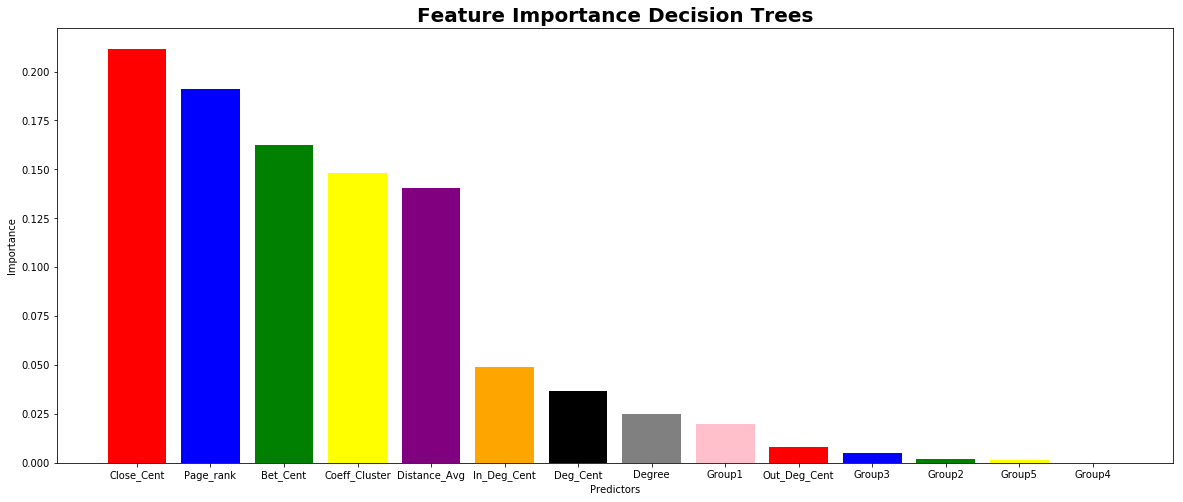

In [50]:
#Features Selection 1
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import numpy as np
# Train/Test split (with omitted non-important features)
X= df[['Coeff_Cluster', 'Page_rank', 'Deg_Cent',
       'Close_Cent', 'Bet_Cent', 'Degree', 'In_Deg_Cent', 'Out_Deg_Cent',
       'Distance_Avg', 'Group1', 'Group2', 'Group3', 'Group4', 'Group5'
      ]]
y=df['review']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Decision Tree
def decision_tree_feature_selection(X_train, y_train,X_test, y_test):
    from sklearn.tree import DecisionTreeRegressor
    
    #Fit model
    clf = DecisionTreeRegressor().fit(X_train, y_train)

    train_score= clf.score(X_train, y_train)
    test_score= clf.score(X_test, y_test)
    feature_importances=clf.feature_importances_
    
    my_dict = dict(zip(X.columns,feature_importances))
    my_dict2= sorted(my_dict, key=my_dict.get, reverse=True)
    top_20_feat=sorted(feature_importances, reverse= True)
    
    return my_dict2, top_20_feat

x1,y = decision_tree_feature_selection(X_train_scaled, y_train,X_test_scaled, y_test)

#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x1, y, color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Feature Importance Decision Trees', fontweight='bold',size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

Text(0, 0.5, 'Importance')

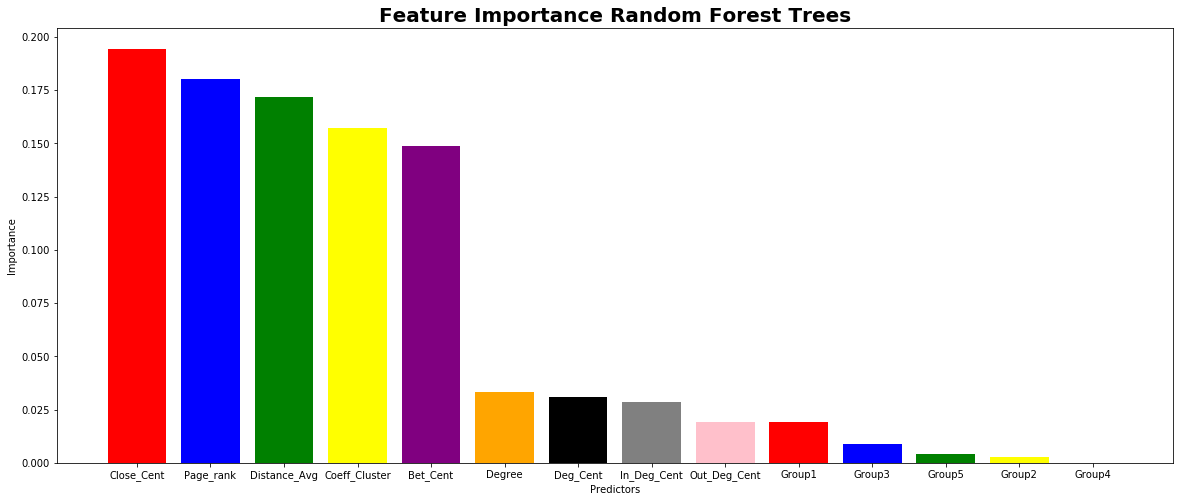

In [51]:
#Features Selection 2
def random_fores_feature_selection(X_train, y_train,X_test, y_test):
    from sklearn.ensemble import RandomForestRegressor
    
    #Fit model
    clf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
    
    #Metrics
    train_score= clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    feature_importances= clf.feature_importances_
    
    my_dict = dict(zip(X.columns,feature_importances))
    my_dict2= sorted(my_dict, key=my_dict.get, reverse=True)
    top_20_feat=sorted(feature_importances, reverse= True)
    
    return my_dict2, top_20_feat

x2,y =random_fores_feature_selection(X_train_scaled, y_train,X_test_scaled, y_test)

#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x2, y, color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Feature Importance Random Forest Trees', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

Text(0, 0.5, 'Importance')

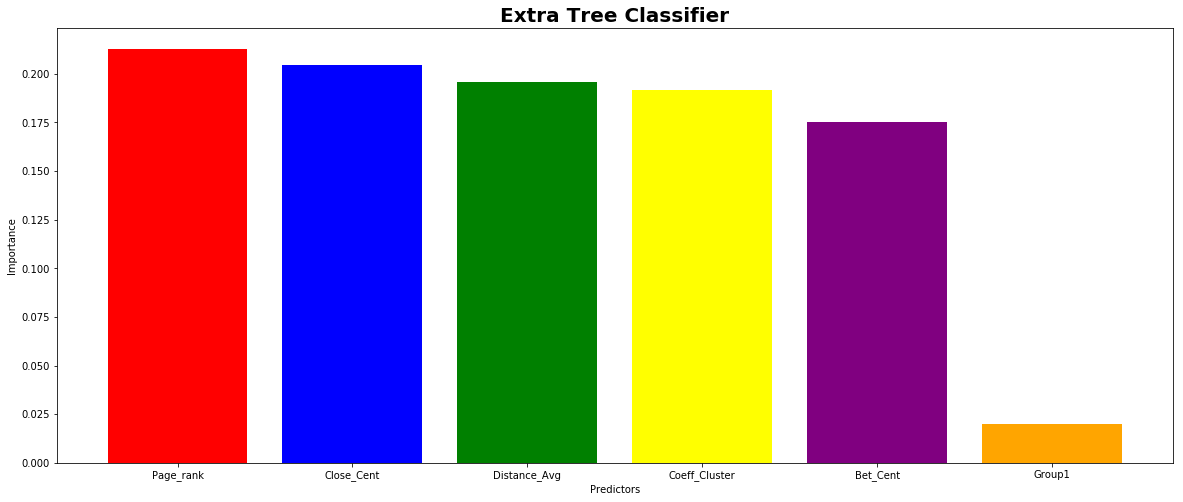

In [102]:
#Features Selection 3
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

model = ExtraTreesRegressor()
model.fit(X_train_scaled,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns,)

a= feat_importances.nlargest(15).to_frame()


#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(a.index, a[0], color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Extra Tree Classifier', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

**Modeling**

- SVR
- MLPRegressor
- RandomForest


In [180]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import operator
import numpy as np

#MODEL 1 (SVR)
# Train/Test split (with omitted non-important features)
X= df[[ 'Coeff_Cluster', 'Page_rank',#'Deg_Cent',
       'Close_Cent', 'Bet_Cent',#'Degree',
      #'In_Deg_Cent',# 'Out_Deg_Cent',
      'Group1',
       #'Group2', 'Group3', 'Group4', 'Group5', 
      'Distance_Avg' 
      ]]
y=df['review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
scores = {}
for this_kernel in ['linear', 'rbf']:
    for this_gamma in [0.1, 0.5, 1,2,5]:
        
        for this_C in [10,15, 15.5,16,16.5,17]:
            
            clf = SVR(kernel=this_kernel, gamma=this_gamma, C=this_C)
            scores[(this_kernel, this_gamma, this_C)] = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=5))
     
best_kernel, best_gamma, best_C = max(scores.items(), key=operator.itemgetter(1))[0]
clf = SVR(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)

In [170]:
best_kernel, best_gamma, best_C

('rbf', 1, 10)

In [171]:
clf = SVR(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)

In [172]:
mean_absolute_error(y_test, pred)

1.3024139741262888

In [100]:
from sklearn.neural_network import MLPRegressor

parameters = {'solver': ['lbfgs','adam'], 
              'activation': ['relu','tanh','logistic'],
              'max_iter': [1000,1100,1500, 2000 ],  
              'alpha': [0.0001,0.001,0.01,0.1],
             'hidden_layer_sizes': [(50,50,50),(50,100,50), (100,1)],
              'learning_rate': ['constant','adaptive']
                                    }

clf = GridSearchCV(MLPRegressor(),  parameters, n_jobs=-1,cv=3,scoring='neg_mean_absolute_error',)

clf.fit(X_train, y_train)

print(clf.score(X_train_scaled, y_train))
print(clf.best_params_)

-1.592732661372674
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


In [112]:
mlpregressor = MLPRegressor(activation= 'tanh',
                            alpha=0.001, 
                            hidden_layer_sizes=(50, 50, 50),
                            learning_rate= 'adaptive',
                            max_iter=1000, 
                            solver='adam')

mlpregressor.fit(X_train_scaled,y_train)
predMLP = mlpregressor.predict(X_test_scaled)
mean_absolute_error(y_test, predMLP)

1.6043381486886057

In [107]:
#Random Forests
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Parameters
# Number of trees in random forest
n_estimators = [100,200,1000]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [10,30,70]

max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1,2,3]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

# First create the base model to tune
rf = RandomForestRegressor()

model = GridSearchCV(estimator = rf, param_grid = param, cv=2,
                           n_jobs = -1, verbose = 2,scoring='neg_mean_absolute_error' )

# Fit the random search model
model.fit(X_train, y_train)

model.best_params_

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.9min finished


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [111]:
# First create the base model to tune
rf = RandomForestRegressor(max_depth= 10,
                           max_features='auto',
                           min_samples_leaf= 4,
                           min_samples_split=2,
                           n_estimators= 100)

# Fit the random search model
rf.fit(X_train_scaled2, y_train2)

#Predict
predRF=rf.predict(X_test_scaled2)

#MAE
mean_absolute_error(y_test2, predRF)

1.6330992609352557

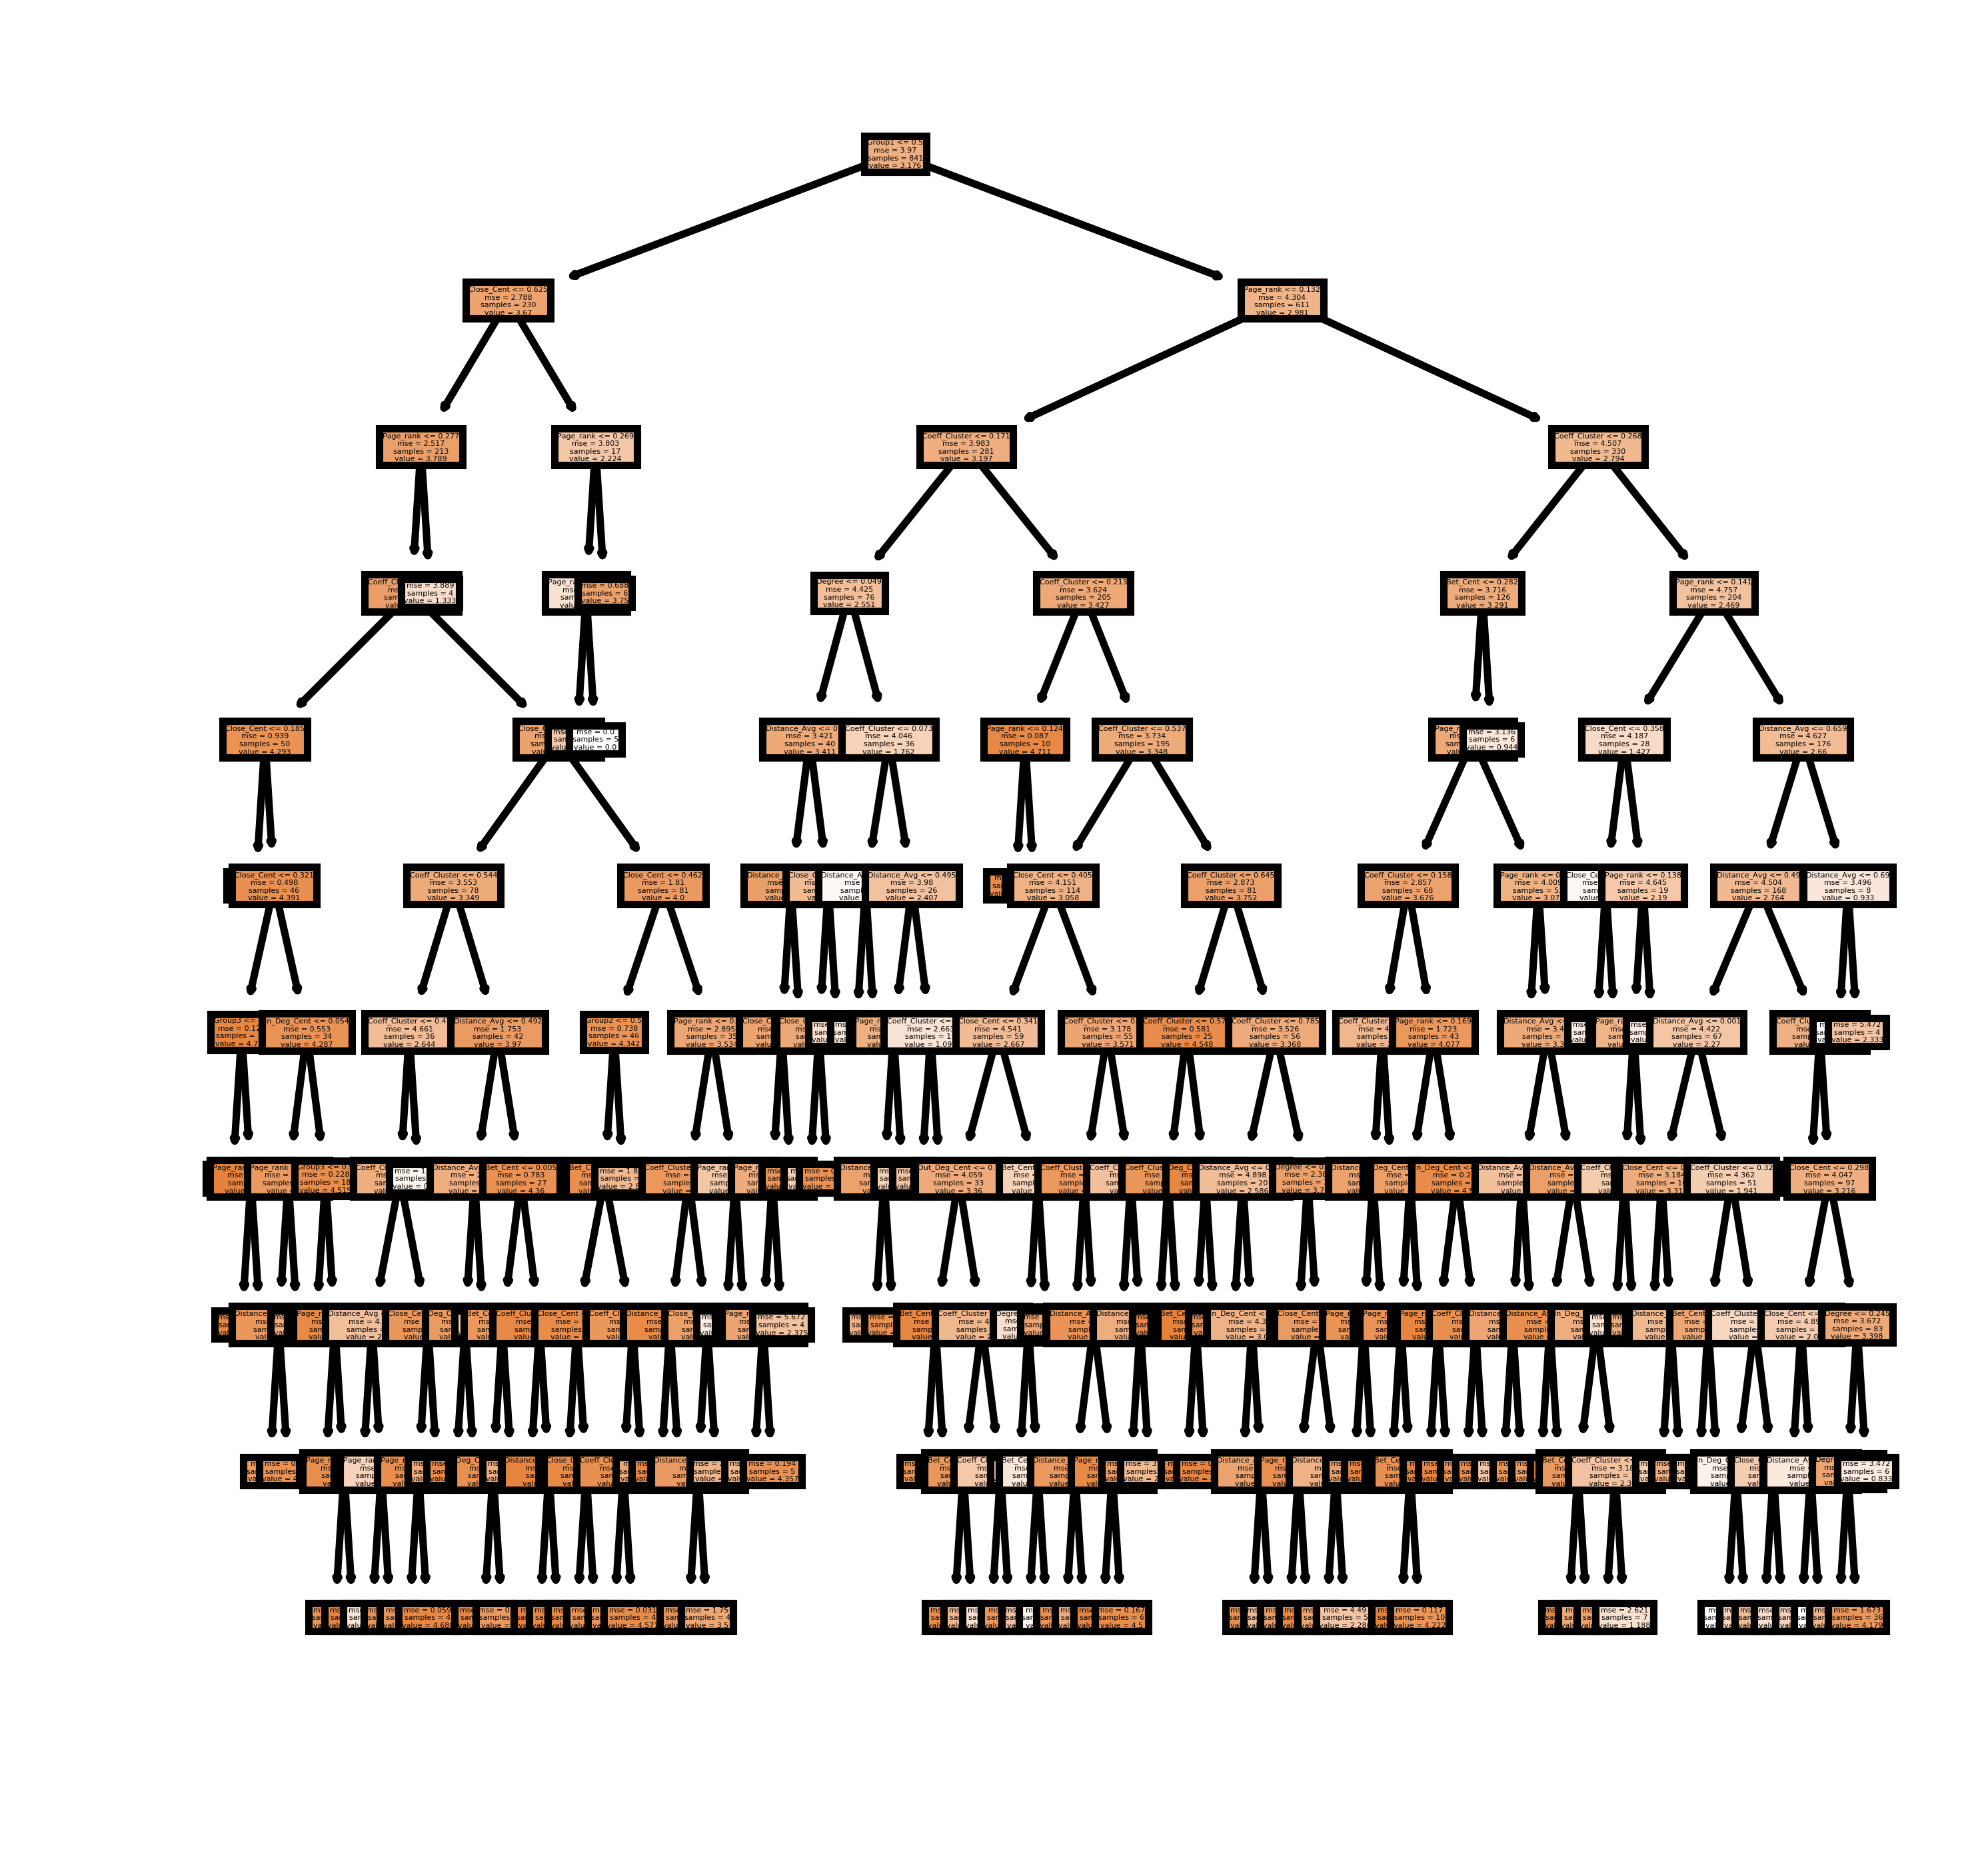

In [123]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = X.columns, 
               #class_names=cn,
               filled = True);
fig.savefig('rf_tree.png')

In [135]:
#Random Forest vs SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#RMSE 
from sklearn.metrics import mean_squared_error

print("MSE Random Forest:", mean_squared_error(y_test, predRF))
print("MSE SVR:", mean_squared_error(y_test, pred))
print("MSE MLP:", mean_squared_error(y_test, predMLP))

MSE Random Forest: 3.746364996910752
MSE SVR: 4.195869021455419
MSE MLP: 3.552365890466496


**Test Dataset**

- Re-create Dataset as in the training case where ONLY the predictors from SVR are created   
- Run model (SVR)
- Save results to csv

In [184]:
amazonTest.head()

,id,title,group,review
0,90,The Eagle Has Landed,Book,3.5
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5
3,253,Celtic Glory,Music,4.0
4,671,Sublte Aromatherapy,Book,3.5


**Coefficient Cluster**

In [189]:
#Merged Dataframe
df2 = amazonTest.merge(coef_frame, on=['id'], how='outer')

#Fill with zero's all nodes not present in the network,but present in the current dataset
df2['Coeff_Cluster'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df2 = df2[df2['title'].notna()]

1000


,id,title,group,review,Coeff_Cluster
0,90,The Eagle Has Landed,Book,3.5,0.250000
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,0.288462
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,0.750000
3,253,Celtic Glory,Music,4.0,0.750000
4,671,Sublte Aromatherapy,Book,3.5,0.562500


**Page Rank**

In [190]:
#Merged Dataframe
df2 = df2.merge(prank_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df2['Page_rank'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df2 = df2[df2['title'].notna()]
print(len(df2))
df2.head()

1000


,id,title,group,review,Coeff_Cluster,Page_rank
0,90,The Eagle Has Landed,Book,3.5,0.250000,0.000347
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,0.288462,0.000300
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,0.750000,0.000338
3,253,Celtic Glory,Music,4.0,0.750000,0.000268
4,671,Sublte Aromatherapy,Book,3.5,0.562500,0.000358


**Closness Centrality**

In [191]:
#Merged Dataframe
df2 = df2.merge(clos_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df2['Close_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df2 = df2[df2['title'].notna()]
print(len(df2))
df2.head()

1000


,id,title,group,review,Coeff_Cluster,Page_rank,Close_Cent
0,90,The Eagle Has Landed,Book,3.5,0.250000,0.000347,0.116428
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,0.288462,0.000300,0.080232
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,0.750000,0.000338,0.063412
3,253,Celtic Glory,Music,4.0,0.750000,0.000268,0.072458
4,671,Sublte Aromatherapy,Book,3.5,0.562500,0.000358,0.093620


**Betweness Centrality**

In [192]:
#Merged Dataframe
df2 = df2.merge(bet_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df2['Bet_Cent'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df2 = df2[df2['title'].notna()]
print(len(df2))
df2.head()

1000


,id,title,group,review,Coeff_Cluster,Page_rank,Close_Cent,Bet_Cent
0,90,The Eagle Has Landed,Book,3.5,0.250000,0.000347,0.116428,0.031141
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,0.288462,0.000300,0.080232,0.010206
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,0.750000,0.000338,0.063412,0.000678
3,253,Celtic Glory,Music,4.0,0.750000,0.000268,0.072458,0.000422
4,671,Sublte Aromatherapy,Book,3.5,0.562500,0.000358,0.093620,0.001470


**Average Distance**

In [193]:
#Merged Dataframe
df2 = df2.merge(dis_all_frame, on=['id'], how='outer')

# Fill with zero's all nodes not present in the network,but present in the current dataset
df2['Distance_Avg'].fillna(0, inplace=True)

#Keep only values from train (rest are not meaningful in here)
df2 = df2[df2['title'].notna()]
print(len(df2))
df2.head()


1000


,id,title,group,review,Coeff_Cluster,Page_rank,Close_Cent,Bet_Cent,Distance_Avg
0,90,The Eagle Has Landed,Book,3.5,0.250000,0.000347,0.116428,0.031141,28853.0
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,0.288462,0.000300,0.080232,0.010206,28835.0
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,0.750000,0.000338,0.063412,0.000678,29684.0
3,253,Celtic Glory,Music,4.0,0.750000,0.000268,0.072458,0.000422,546.0
4,671,Sublte Aromatherapy,Book,3.5,0.562500,0.000358,0.093620,0.001470,30439.0


**One Hot Encoding**

In [199]:
#Perform one Hot Encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer 

#One hot Encoder
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df2[['group']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()

#Re-create DataFrame
features = pd.DataFrame(feature_arr,columns= ['Group1', 'Group2', 'Group3' , 'Group4']) 

#Rename & drop original  
df2[['Group1', 'Group2', 'Group3' , 'Group4']]= features[['Group1', 'Group2', 'Group3' , 'Group4']]
df2=df2.drop(['group','Group2','Group2', 'Group3' , 'Group4'], axis=1)
df2.head()

,id,title,review,Coeff_Cluster,Page_rank,Close_Cent,Bet_Cent,Distance_Avg,Group1
0,90,The Eagle Has Landed,3.5,0.250000,0.000347,0.116428,0.031141,28853.0,1.0
1,1372,Che in Africa: Che Guevara's Congo Diary,3.5,0.288462,0.000300,0.080232,0.010206,28835.0,1.0
2,1382,The Darwin Awards II : Unnatural Selection,3.5,0.750000,0.000338,0.063412,0.000678,29684.0,1.0
3,253,Celtic Glory,4.0,0.750000,0.000268,0.072458,0.000422,546.0,0.0
4,671,Sublte Aromatherapy,3.5,0.562500,0.000358,0.093620,0.001470,30439.0,1.0


**SVR Model**

In [203]:
# Train/Test split
X= df[[ 'Coeff_Cluster', 'Page_rank','Close_Cent', 'Bet_Cent','Group1', 'Distance_Avg'  ]]
y=df['review']

#Test Data
X_test= df2[[ 'Coeff_Cluster', 'Page_rank','Close_Cent', 'Bet_Cent','Group1', 'Distance_Avg' ]]

# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#Train Model on train data 
clf = SVR(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y)

#Test Prediction
Testpred = clf.predict(X_test_scaled)

amazonTest['prediction']=Testpred

In [206]:
amazonTest.head()

,id,title,group,review,prediction
0,90,The Eagle Has Landed,Book,3.5,4.152592
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,3.5,4.128682
2,1382,The Darwin Awards II : Unnatural Selection,Book,3.5,3.925115
3,253,Celtic Glory,Music,4.0,4.668282
4,671,Sublte Aromatherapy,Book,3.5,3.947462


In [205]:
#Final MAE -impressive  :) 
mean_absolute_error(amazonTest['review'], amazonTest['prediction'])

0.5069876914922837

In [207]:
#Save Results
amazonTest.to_csv("amazonPrediction.csv")

**Conlusion**

This homework was quite informative about graphs. I had never before used the library NetworkX, and I am quite impressed with its functionalities and potential. Once again, I submit this homework with a proud feeling of accomplishment. 

Thank you to the teaching team for your effor in grading this homework. 

-Martin :) 

---